In [1]:
!pip install IPython
from IPython.display import Image

In [2]:
!git clone https://github.com/Seung-hwanSong/LG2024_DTKNN.git #코랩 사용

'git' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
Image('/content/LG2024_DTKNN/image/intro1.png')

FileNotFoundError: No such file or directory: '/content/LG2024_DTKNN/image/intro1.png'

FileNotFoundError: No such file or directory: '/content/LG2024_DTKNN/image/intro1.png'

<IPython.core.display.Image object>

# [머신러닝 기반 시계열 분석 1 실습]
# Decision Tree & k-NN 
## [Decision Tree: Regression Tree - Toy Example]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

## 1. 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [4]:
""" 데이터 전처리 """
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

""" 모델 생성, 학습, 평가 """
from sklearn.tree import DecisionTreeRegressor

""" 시각화 """
import matplotlib.pyplot as plt

##  2. 데이터 임의 생성 

$ y=sin(x)+\epsilon $

In [5]:
""" seed 고정으로 같은 데이터를 만들 수 있도록 설정 """
random_state = 2024
n_samples = 50

In [6]:
np.random.seed(random_state)

X = np.random.rand(n_samples, 1) * 10
X = np.sort(X, axis=0) # 내림차순 정렬

y = np.sin(X).reshape(-1, )
y[::5] = y[::5] + np.random.randn(int(np.ceil(n_samples/5)))

In [7]:
X_test = np.arange(0, 10, 0.01).reshape(-1, 1)

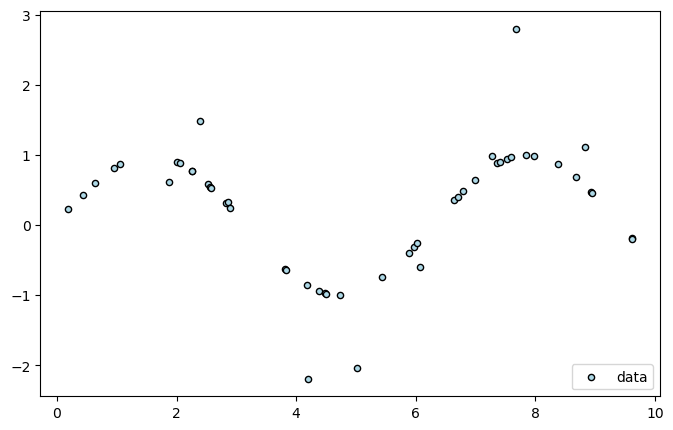

In [8]:
""" 생성된 데이터 확인 """
plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')
plt.legend(loc='lower right') # 범주 조절
plt.show()

# 3. Decision Tree Regressor

In [9]:
model = DecisionTreeRegressor(max_depth=None)
model.fit(X, y)

DecisionTreeRegressor()

In [10]:
y_pred = model.predict(X_test)

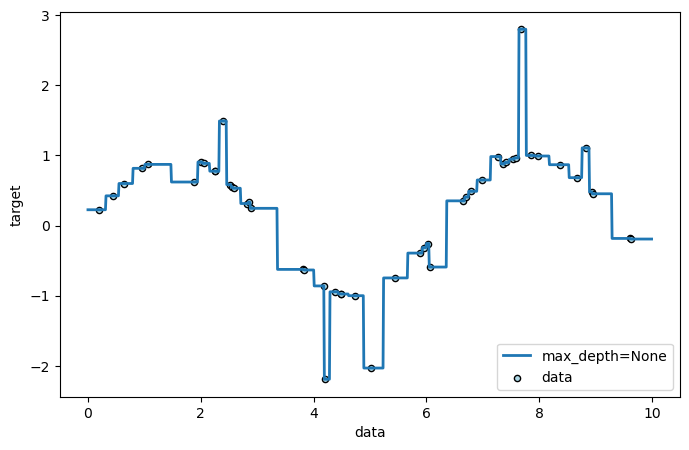

In [11]:
# 원본 데이터 및 결과 시각화
plt.figure(figsize=(8, 5))

plt.plot(X_test, y_pred, label='max_depth=None', linewidth=2)
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')

plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='lower right')
plt.show()

## 3.1 depth를 바꾸며 결과 확인

In [12]:
max_depths = [3, 5, None]

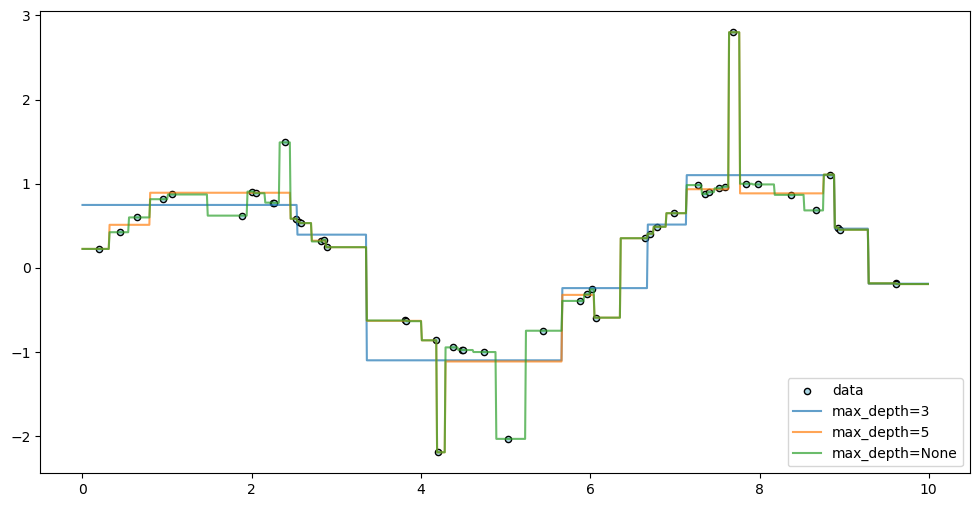

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')
for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X, y)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # plot
    plt.plot(X_test, y_pred, label='max_depth={}'.format(max_depth), linewidth=1.5, alpha=0.7)
    
plt.legend(loc='lower right')
plt.show()

# EOD